In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

from sdipylib.plot import  source_attribution

from publicdata import geoframe, dataframe

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Small business loan originations, by county and year
`ffiec.gov-cra_disclosure-county-d11-1.1.1` Last Update: 2020-08-17T23:07:26

_Multi-year CRA disclosures for small business originations, aggregated to county and year_


## Documentation Links

* [Disclosure File Specifications](https://www.ffiec.gov/cra/pdf/17FlatDiscSpecs.pdf) File specifications for the 2017 Disclosure Flat File
* [CRA Data Products](https://www.ffiec.gov/cra/craproducts.htm) 
* [Aggregate & Disclosure Flat Files](https://www.ffiec.gov/cra/craflatfiles.htm) Links to download the files.

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [smb_orig_county](data/smb_orig_county.csv)**. Small business loan originations by county

## References
<ul><li> <strong>cra_d11</string>, <em>metapack+http://library.metatab.org/ffiec.gov-cra_disclosure-d11.csv</em>. Source data, CRA small business originations</li><ul>

In [3]:
 smb_orig_county = pkg.resource('smb_orig_county').dataframe()
    

In [4]:
 smb_orig_county  = smb_orig_county.set_index(['geoid','year'])

In [5]:
g = geoframe('census://US/county')

In [6]:
from geoid.acs import AcsGeoid

def prse(v):
    try:
        return AcsGeoid.parse(v).stusab
    except KeyError:
        return None
        

g['stusab'] = g.geoid.apply(prse )

contus = g[~g.stusab.isin(['PR','AK','HI', None])].set_index('geoid')


In [7]:
counties =  dataframe('census://US/county/B01003')

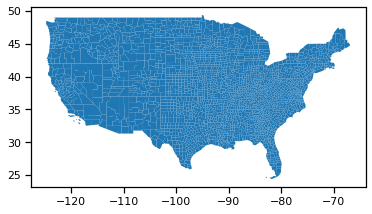

In [13]:
t.plot()

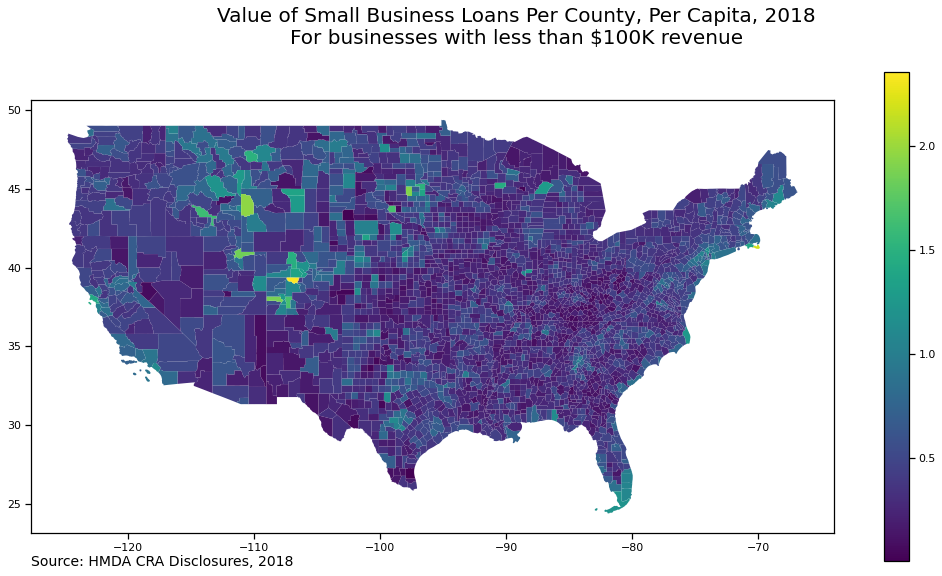

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(18,9))
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

t = smb_orig_county.loc[(slice(None),2018),:].join(counties)
t = contus[['geometry']].join(t).fillna(0).reset_index()
t['tot_orig_bus_lt100k'] = t.tot_orig_bus_lt100k.astype(int)
t['rate'] = t.tot_orig_bus_lt100k / t.b01003_001
t = t.dropna()
t.plot(column='rate', legend = True, ax=ax)
fig.suptitle('Value of Small Business Loans Per County, Per Capita, 2018\nFor businesses with less than $100K revenue',  fontsize=20);
#plt.gcf().text(.15,.05, f"Source: HMDA CRA Disclosures, 2018", fontsize=14) 

source_attribution(ax, f"Source: HMDA CRA Disclosures, 2018")


In [ ]:
!pip install mapclassify